In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import os
import pymysql
import numpy as np
import seaborn as sns

In [3]:
host=os.getenv('Local')

In [4]:
conn=pymysql.connect(
    host='localhost',
    user='root',
    passwd='Pari@1234',
    db='Patient_Management_System_Project'
)

In [65]:
patients=pd.read_sql('select * from Patient',conn)
Pharmacy=pd.read_sql('select * from Pharmacy',conn)
department=pd.read_sql('select * from department',conn)
Medication=pd.read_sql('select * from Medication',conn)
Ward=pd.read_sql('select * from Ward',conn)
Treatment=pd.read_sql('select * from Treatment',conn)
Appointment=pd.read_sql('select * from Appointment',conn)
Research_Project=pd.read_sql('select * from Research_Project',conn)
Doctor=pd.read_sql('select * from Doctor',conn)
Staff=pd.read_sql('select * from Staff',conn)
Medication_Doctor=pd.read_sql('select * from Medication_Doctor',conn)
Treatment_Patient=pd.read_sql('select * from Treatment_Patient',conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_21088\937274100.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  patients=pd.read_sql('select * from Patient',conn)
C:\Users\hp\AppData\Local\Temp\ipykernel_21088\937274100.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Pharmacy=pd.read_sql('select * from Pharmacy',conn)
C:\Users\hp\AppData\Local\Temp\ipykernel_21088\937274100.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department=pd.read_sql('select * from department',conn)
C:\Users\hp\AppData\Local\Temp\ipykernel_21

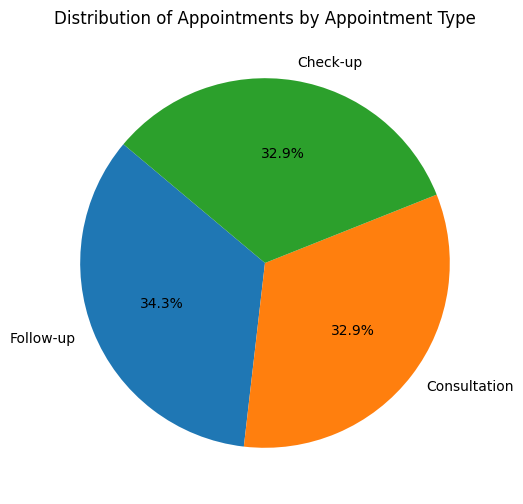

In [5]:
cursor = conn.cursor()
cursor.execute("""
    SELECT A_type, COUNT(*) AS count
    FROM Appointment
    GROUP BY A_type;
""")
appointment_counts = cursor.fetchall()


appointment_types = [row[0] for row in appointment_counts]
counts = [row[1] for row in appointment_counts]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=appointment_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Appointments by Appointment Type')
plt.show()

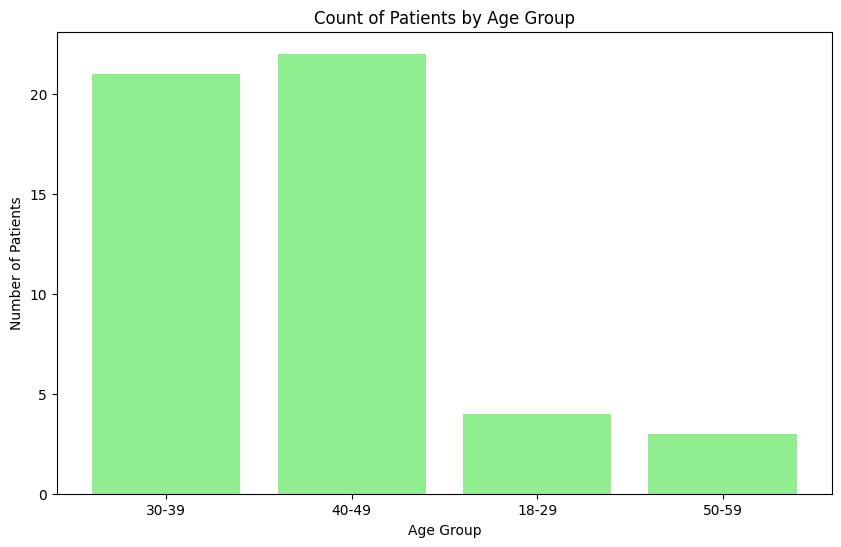

In [6]:


cursor = conn.cursor()
cursor.execute("""
    SELECT
        CASE
            WHEN YEAR(CURRENT_DATE()) - YEAR(STR_TO_DATE(DOB, '%Y-%m-%d')) < 18 THEN 'Under 18'
            WHEN YEAR(CURRENT_DATE()) - YEAR(STR_TO_DATE(DOB, '%Y-%m-%d')) BETWEEN 18 AND 29 THEN '18-29'
            WHEN YEAR(CURRENT_DATE()) - YEAR(STR_TO_DATE(DOB, '%Y-%m-%d')) BETWEEN 30 AND 39 THEN '30-39'
            WHEN YEAR(CURRENT_DATE()) - YEAR(STR_TO_DATE(DOB, '%Y-%m-%d')) BETWEEN 40 AND 49 THEN '40-49'
            WHEN YEAR(CURRENT_DATE()) - YEAR(STR_TO_DATE(DOB, '%Y-%m-%d')) BETWEEN 50 AND 59 THEN '50-59'
            ELSE '60+'
        END AS age_group,
        COUNT(*) AS count
    FROM Patient
    GROUP BY age_group;
""")
patient_counts = cursor.fetchall()


age_groups = [row[0] for row in patient_counts]
counts = [row[1] for row in patient_counts]

plt.figure(figsize=(10, 6))
plt.bar(age_groups, counts, color='lightgreen')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Count of Patients by Age Group')
plt.show()






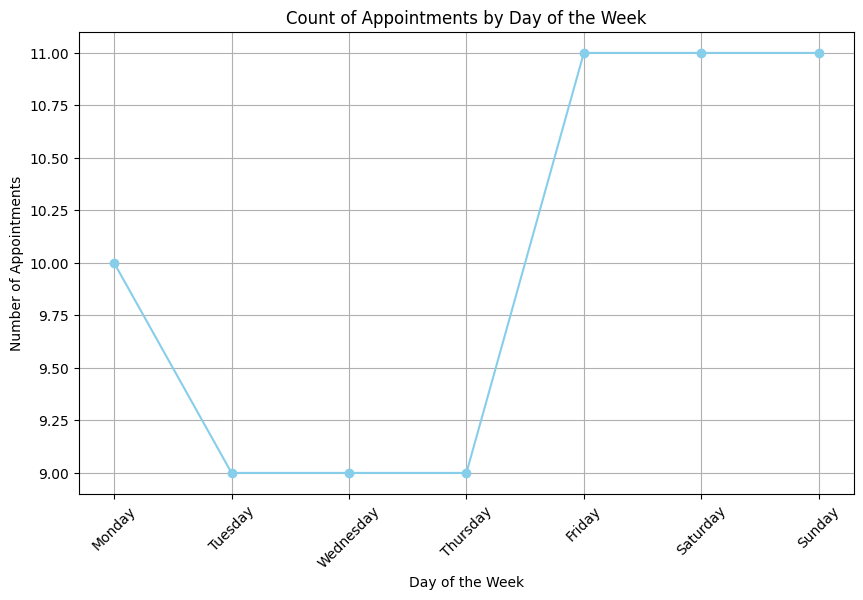

In [8]:
cursor = conn.cursor()
cursor.execute("""
    SELECT DAYNAME(A_date) AS day_of_week, COUNT(*) AS count
    FROM Appointment
    GROUP BY day_of_week
    ORDER BY FIELD(day_of_week, 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday');
""")
appointment_counts = cursor.fetchall()

# Extract data from the result set
days_of_week = [row[0] for row in appointment_counts]
counts = [row[1] for row in appointment_counts]

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(days_of_week, counts, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Appointments')
plt.title('Count of Appointments by Day of the Week')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


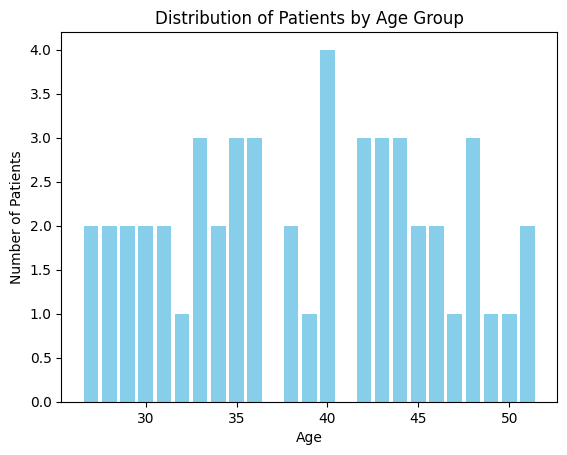

In [9]:
cursor = conn.cursor()

# SQL query to fetch patient data and calculate their age
sql_query = """
SELECT FLOOR(DATEDIFF(CURRENT_DATE(), STR_TO_DATE(DOB, '%Y-%m-%d')) / 365) AS age, COUNT(*) AS count
FROM Patient
GROUP BY age
ORDER BY age
"""
cursor.execute(sql_query)
results = cursor.fetchall()
ages = []
counts = []
for row in results:
    ages.append(row[0])
    counts.append(row[1])

plt.bar(ages, counts, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Age Group')
plt.show()

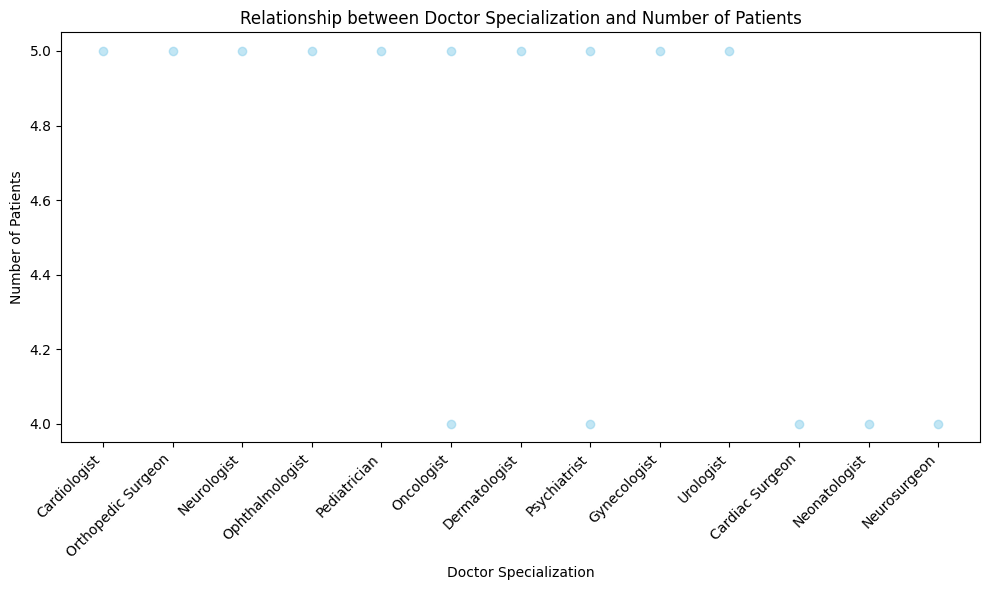

In [10]:
query = """
SELECT doc.Doctor_id, doc.Doctor_name, doc.specialization, COUNT(app.Patient_id) AS patient_count
FROM Doctor doc
LEFT JOIN Appointment app ON doc.Doctor_id = app.doctor_id
GROUP BY doc.Doctor_id
"""
cursor = conn.cursor()

cursor.execute(query)

results = cursor.fetchall()

doctor_patient_df = pd.DataFrame(results, columns=['Doctor ID', 'Doctor Name', 'Specialization', 'Patient Count'])

# Plotting the relationship between the number of patients assigned to each doctor and their specialization using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(doctor_patient_df['Specialization'], doctor_patient_df['Patient Count'], color='skyblue', alpha=0.5)
plt.xlabel('Doctor Specialization')
plt.ylabel('Number of Patients')
plt.title('Relationship between Doctor Specialization and Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()